# APS1070 Fall 2024
#### PCA - Tutorial 3


### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 Iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/master/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

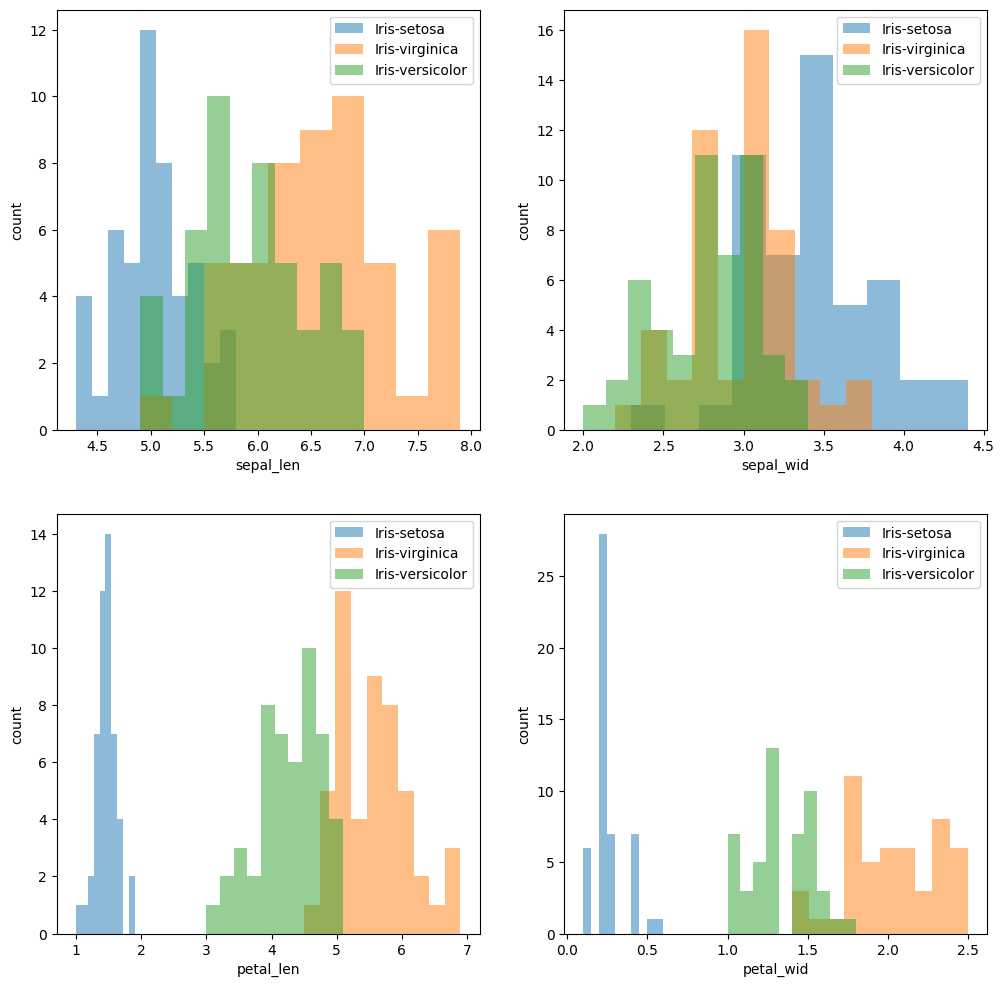

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for chosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label) # np.ndarray.flat: 1-D iterator over the array

    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [7]:
X_std = StandardScaler().fit_transform(X)

In [8]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [9]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.


#### Using Covariance Matrix

In [10]:
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1)
# or C = np.cov(X_std.T)
print(C.shape)
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C)
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

(4, 4)
Eig Vec:
  [[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]  
 Eig Val: 
 [0.02074601 0.14834223 0.92740362 2.93035378]


# numpy.linalg.eigh
linalg.eigh(a, UPLO='L')

[source](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)


Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.


Returns two objects, a 1-D array containing the eigenvalues of a, and a 2-D square array or matrix (depending on the input type) of the corresponding eigenvectors (in columns).

## Parameters:
* a(…, M, M) array: Hermitian or real symmetric matrices whose eigenvalues and eigenvectors are to be computed.
* UPLO{‘L’, ‘U’}, optional: Specifies whether the calculation is done with the lower triangular part of a (‘L’, default) or the upper triangular part (‘U’). Irrespective of this value only the real parts of the diagonal will be considered in the computation to preserve the notion of a Hermitian matrix. It therefore follows that the imaginary part of the diagonal will always be treated as zero.


## Returns: A namedtuple with the following attributes:
* eigenvalues(…, M) ndarray: The eigenvalues in ascending order, each repeated according to its multiplicity.
* eigenvectors{(…, M, M) ndarray, (…, M, M) matrix}: The column eigenvectors[:, i] is the normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. Will return a matrix object if a is a matrix object.

#### Sort based on eigenValues

Decreasing order of eigenValues.

In [11]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
print(eigenValues)
eigenVectors = eigenVectors[:, args]
print(eigenVectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[-0.52237162  0.37231836  0.72101681  0.26199559]
 [ 0.26335492  0.92555649 -0.24203288 -0.12413481]
 [-0.58125401  0.02109478 -0.14089226 -0.80115427]
 [-0.56561105  0.06541577 -0.6338014   0.52354627]]


### Explained Variance

In [12]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [13]:
eigenValues[0]/np.sum(eigenValues)

0.7277045209380132

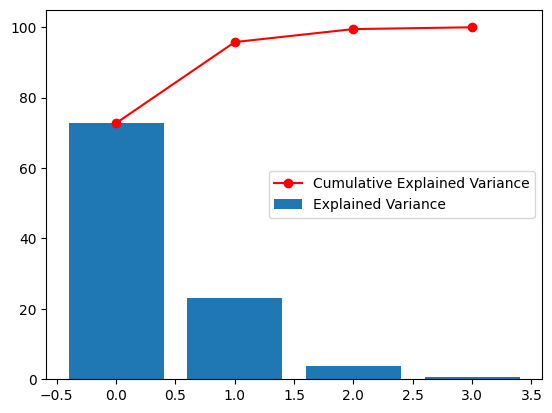

In [14]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

### Projections

Since only 2 eigenvectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

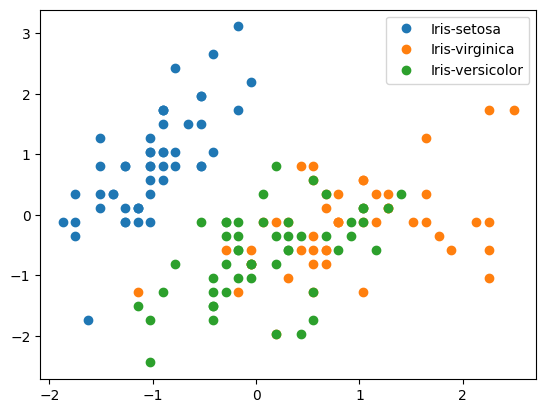

In [15]:
PC_count = 2   # Number of PCs
x_feature = 0  # Plot x-axis
y_feature = 1  # Plot y_axis

# Original Data
for label in labels:
    plt.plot(X_std[y==label, x_feature], X_std[y==label, y_feature], 'o', label=label)
    plt.legend(loc='upper right')

In [16]:
W = eigenVectors[:, 0:PC_count]
W

array([[-0.52237162,  0.37231836],
       [ 0.26335492,  0.92555649],
       [-0.58125401,  0.02109478],
       [-0.56561105,  0.06541577]])

In [17]:
projX = np.dot(X_std, W)
X_std.shape, W.shape , projX.shape

((150, 4), (4, 2), (150, 2))

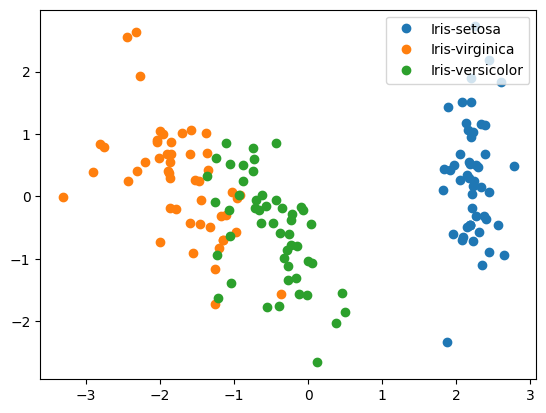

In [18]:
## Projection
for label in labels:
    plt.plot(projX[y==label, x_feature], projX[y==label, y_feature], 'o', label=label)
    plt.legend(loc='upper right')

In [19]:
# Reconstruction
ReconX = np.dot(projX, W.T)
projX.shape, W.T.shape

((150, 2), (2, 4))

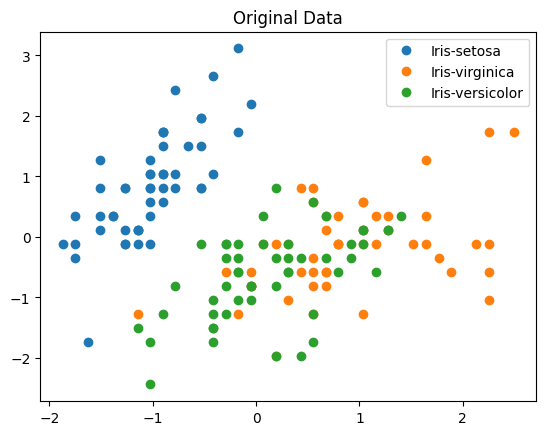

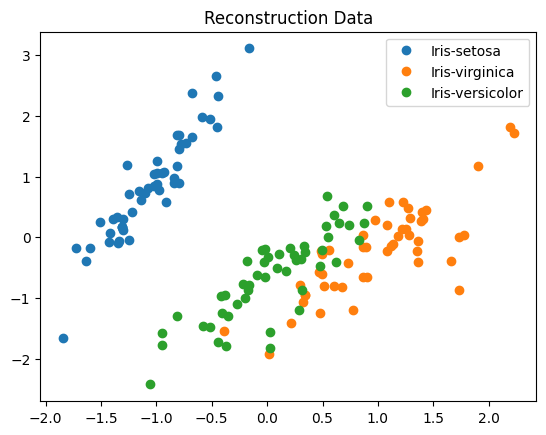

In [20]:
plt.figure()
plt.title("Original Data")
for label in labels:
    plt.plot(X_std[y==label, x_feature], X_std[y==label, y_feature], 'o', label=label)
    plt.legend(loc='upper right')

plt.figure()
plt.title("Reconstruction Data")
for label in labels:
    plt.plot(ReconX[y==label, x_feature], ReconX[y==label, y_feature], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs)

We have used PCA on numerical data. But can it used on Image data?

## Summarizing PCA:

Assume we have a dataset with 1000 samples and 5000 features for each sample: **X: (1000, 5000)**. Total elements: **5,000,000**



1.   We apply PCA, we get **W: (5000, 5000)**
2.   We determine only 10 PCs are enough: **W_op: (5000, 10)**
3.   We apply projection: **X @ W_op = Proj (1000, 10)**
4.   Now data is summarized in **Proj:(1000,10)** and **W_op: (5000, 10)** Total elements: **60,000**!!!
  * Compression Ratio: 5,000,000 / (60,000 + StandardScaler parameters) ~  **80x**
5.   Reconstruction: **Proj @ W_op.T = Recon (1000, 5000)**





a*b = element wise mult


a@b = Matrix mult : np.dot (a,b)

## Eigenfaces

Let's face the Eigen.

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner.

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [21]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9047ddef84b8ab7d81eb368b082f8b72559f3716aae1bdcd27cc92ea09bcd7f5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [22]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [23]:
# Download and unzip dataset.
filename = wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvf "{filename}"

lfw/Aaron_Eckhart/
lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw/Aaron_Guiel/
lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw/Aaron_Patterson/
lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw/Aaron_Peirsol/
lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw/Aaron_Pena/
lfw/Aaron_Pena/Aaron_Pena_0001.jpg
lfw/Aaron_Sorkin/
lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw/Aaron_Tippin/
lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw/Abba_Eban/
lfw/Abba_Eban/Abba_Eban_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Abdel_Aziz_Al-Hakim/
lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw/Abdel_Madi_Shabneh/
lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw/Abdel_Nasser_Assidi/
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
lfw/Abdoulaye_Wade/
lfw/Abdoulay

In [24]:
!file lfw-a.tgz

lfw-a.tgz: POSIX tar archive (GNU)


In [25]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250]

In [26]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]

        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale

            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image

            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [27]:
[X, y] = readImages()

<ipython-input-26-860f10e228e5>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(defaultSize, Image.ANTIALIAS) # resize image


In [28]:
type(X), len(X)

(list, 1054)

In [29]:
type(X[0]), X[0].shape

(numpy.ndarray, (250, 250))

In [30]:
type(y), len(y)

(list, 1054)

In [31]:
print (X[100] ,"\n", y[100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 Allan_Wagner


### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Allan_Wagner


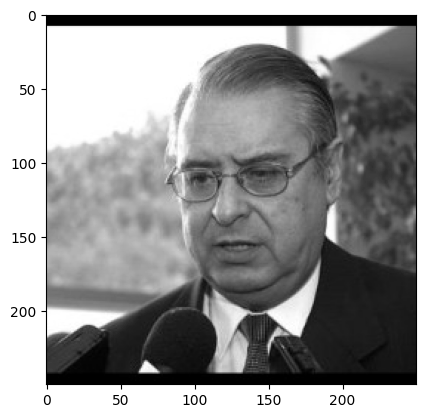

In [32]:
print('Image name is: ', y[100])
plt.imshow(X[100], cmap=plt.cm.gray)
plt.show()

[[250 208 173 149 122 102  90  75  68  70  68  69  73  71  71  67  66  68
   70  70]
 [247 179 131 113 111  81  69  60  58  64  65  63  59  55  49  49  52  56
   56  54]
 [238 151 114 101  92  63  67  66  60  55  57  58  56  55  48  48  47  45
   45  48]
 [232 137 118 101  76  65  59  74  77  73  79  83  79  75  69  67  60  54
   55  60]
 [203 140 106 106  96  99  98  97 108 119 137 141 130 129 122 125 122 123
  106  93]
 [172 145 126 131 111  89  90  85  85  92 105 105  94  89  88  83  85  96
  100 108]
 [152 139 113 116 129 131 131 123 112 114 114 111 111 112 113 106 105  99
   99 111]
 [148 200 218 170 151 159 142 126 102  97  83  73  68  64  64  60  62  63
   86 104]
 [207 214 240 176 151 159 131 109  87  92  83  80  68  60  54  59  55  51
   75  82]
 [188 197 248 166 134 163 141 109  86  81  61  61  48  49  37  50  49  42
   52  51]
 [180 191 248 182 136 142 143  98  72  60  37  46  30  38  30  34  36  48
   64  78]
 [172 191 239 181 126 110 142  83  56  54  49  70  42  41  42  36

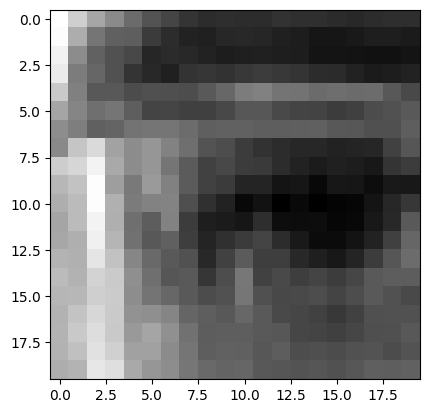

In [33]:
print(X[100][100:120,90:110])
plt.imshow(X[100][100:120,90:110] ,cmap=plt.cm.gray )


Creating a mean face from all dataset faces.

In [34]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

(1054, 62500)
(62500,)


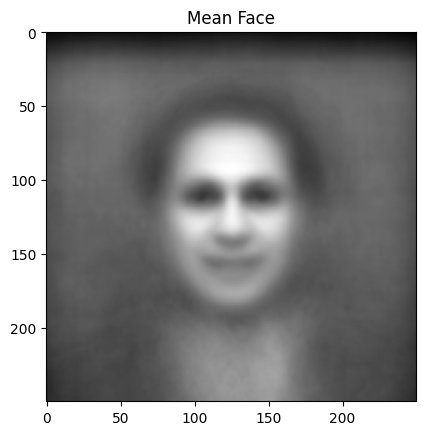

In [35]:
XMat = asRowMatrix(X);
print(XMat.shape)
print(XMat.mean(axis=0).shape)
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

In [36]:
XMat.shape

(1054, 62500)

In [37]:
len(X), X[0].shape

(1054, (250, 250))

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [38]:
# Below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

<img src='https://raw.githubusercontent.com/Sabaae/Dataset/master/eig-decom.png' />

In [39]:
test=np.array([[2,3,1,0],[4,5,5,5]])
n_test,d_test=test.shape
test

array([[2, 3, 1, 0],
       [4, 5, 5, 5]])

In [40]:
Ctest = np.dot(test.T,test) / (n_test-1)
eigenValues_test, eigenVectors_test = np.linalg.eigh(Ctest)
print(eigenValues_test,'\n\n', eigenVectors_test)

[-8.73072746e-15  2.13322429e-15  4.89485322e+00  1.00105147e+02] 

 [[ 0.81597871  0.22014644 -0.30056915 -0.44200958]
 [-0.41997081 -0.39012299 -0.59062943 -0.56796607]
 [-0.37204499  0.73007609  0.26904254 -0.50614972]
 [ 0.13923283 -0.51607025  0.69887852 -0.47524155]]


In [41]:
Ctest = np.dot(test,test.T) / (n_test-1)
eigenValues_test, eigenVectors_test = np.linalg.eigh(Ctest)
eigenVectors_test=np.dot(test.T,eigenVectors_test)
print(eigenVectors_test.shape)
eigenVectors_test[:,0] = eigenVectors_test[:, 0] / np.linalg.norm(eigenVectors_test[:, 0])
eigenVectors_test[:,1] = eigenVectors_test[:, 1] / np.linalg.norm(eigenVectors_test[:, 1])
print(eigenValues_test,'\n\n', eigenVectors_test)

(4, 2)
[  4.89485322 100.10514678] 

 [[-0.30056915  0.44200958]
 [-0.59062943  0.56796607]
 [ 0.26904254  0.50614972]
 [ 0.69887852  0.47524155]]


In [42]:
def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx

def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data

    if n > d:
        C = np.dot(X.T,X) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X,X.T) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])

    print ("Dim of Full Eigen Vectors", eigenVectors.shape)

    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]

    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

In [43]:
eigenValues, eigenVectors, mean = pca(XMat, y)

Dim of Full Eigen Vectors (62500, 1054)
Number of useful eigenBasis are:  535


In [44]:
eigenValues.shape , eigenVectors.shape

((535,), (62500, 535))

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500).

In [45]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

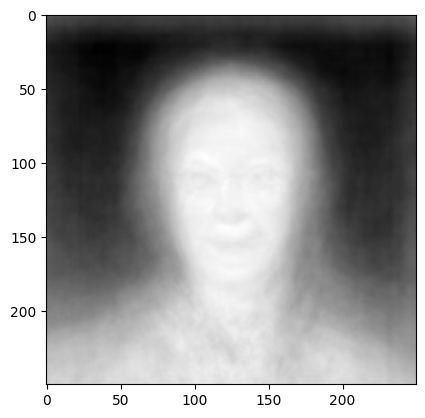

In [46]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

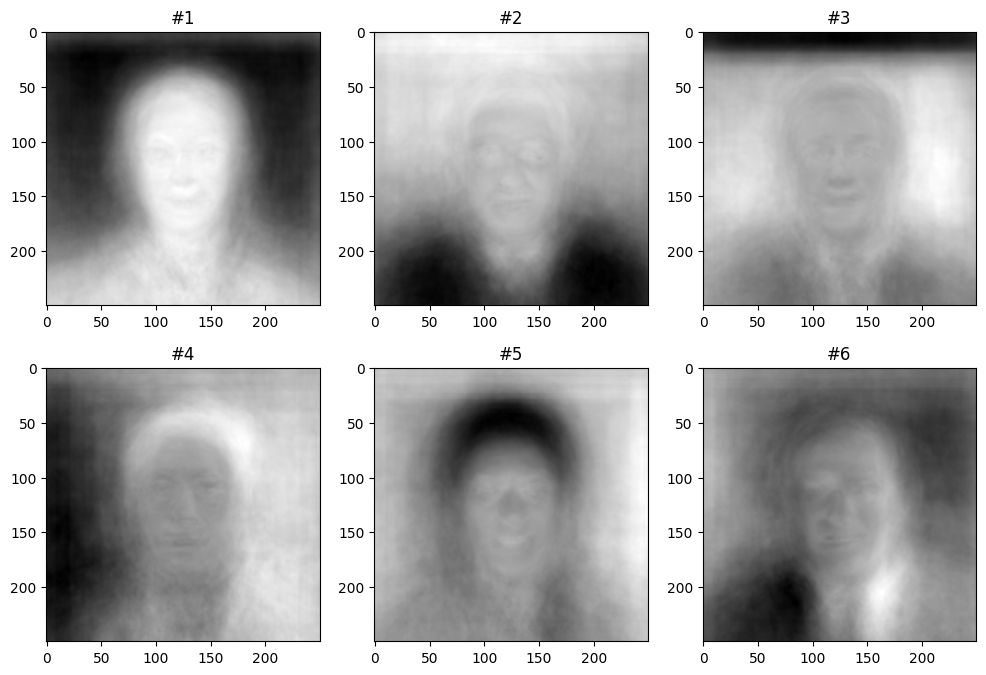

In [47]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [48]:
IMAGE_IDX = 55 # image idx in dataset

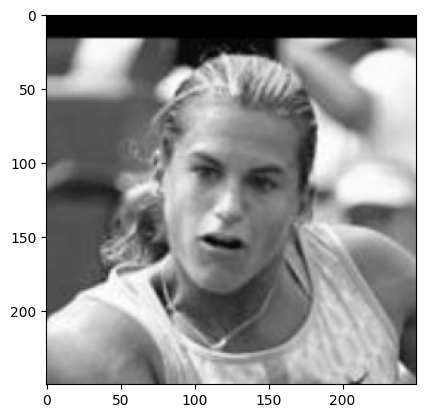

In [49]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

In [50]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [51]:
mean.reshape(1, -1).shape

(1, 62500)

In [52]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean.reshape(1,-1))
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean.reshape(1,-1))
    reconImages.append(R.reshape(X[0].shape))

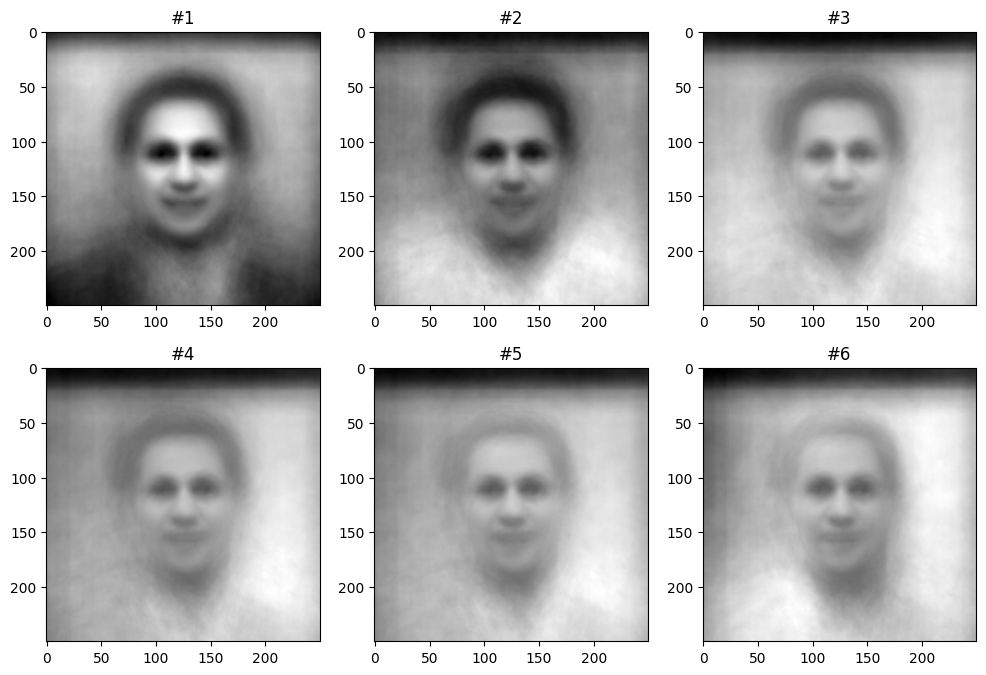

In [53]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [54]:
# create reconstructed images
numEvsSet = [1, 10, 100, 200, 400, 500, 535] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

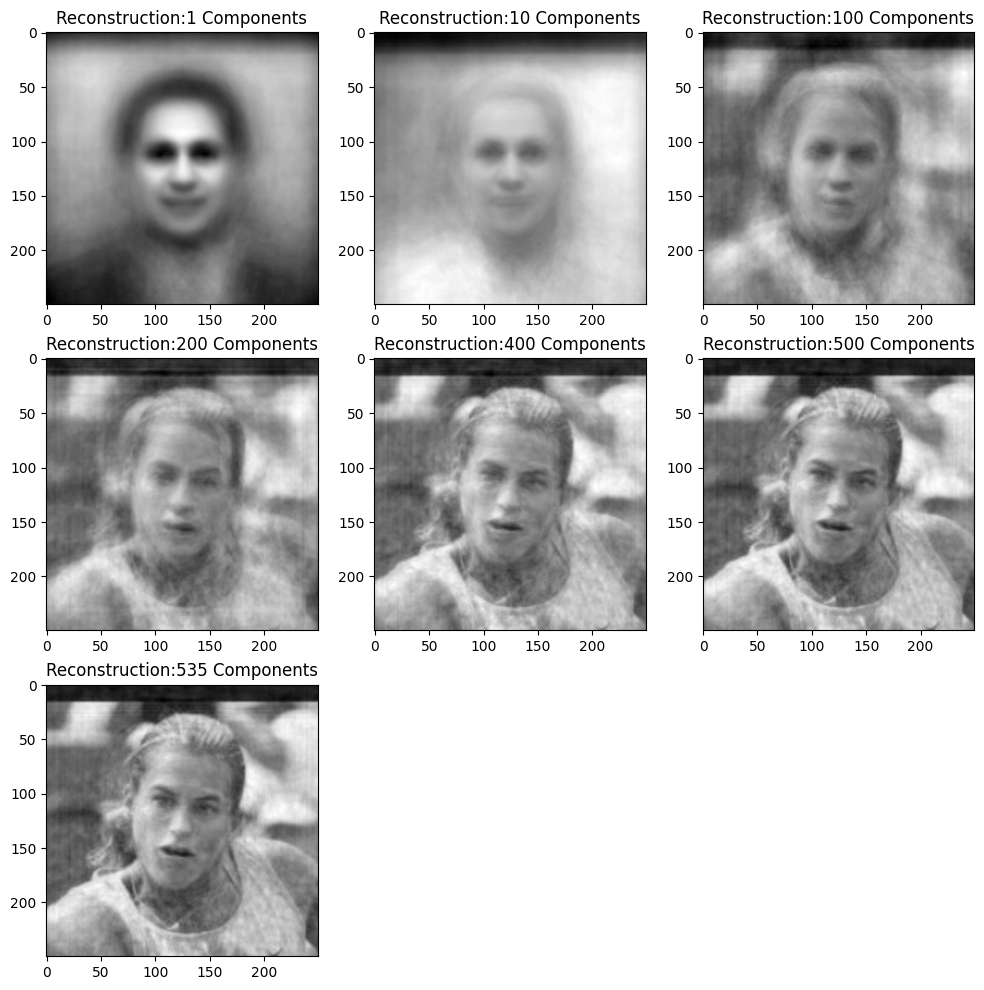

In [55]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title("Reconstruction:"+ str(numEvsSet[i]) + " Components" )

####Let's create an animation of reconstruction!

Progress: 0.00  %
Progress: 9.35  %
Progress: 18.69  %
Progress: 28.04  %
Progress: 37.38  %
Progress: 46.73  %
Progress: 56.07  %
Progress: 65.42  %
Progress: 74.77  %
Progress: 84.11  %
Progress: 93.46  %


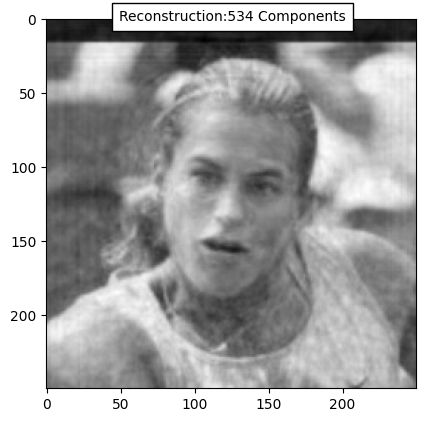

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from google.colab import files


fig = plt.figure()

ims = []
reconImages = []

for numEvs in range (0 , eigenVectors.shape[1]):
    if numEvs % 50 ==0:
      print ("Progress: %.2f " % (numEvs *100/ eigenVectors.shape[1]), "%")

    title = plt.text(125.5,0.85, "", bbox={'facecolor':'w', 'alpha':1, 'pad':5},
                 ha="center")

    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages=(R.reshape(X[0].shape))
    title.set_text("Reconstruction:"+ str(numEvs) + " Components")
    im = plt.imshow(reconImages, cmap = plt.cm.gray)
    ims.append([im, title])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.mp4')

plt.show()

files.download('dynamic_images.mp4')